In [6]:
import sys
import os
import pathlib

import torch

from inference import InferencePipeline
from trainer import Trainer
from uploader import upload
import gradio as gr

In [2]:
pipe = InferencePipeline()

running
start
loaded pipe


100%|██████████| 100/100 [00:08<00:00, 11.44it/s]


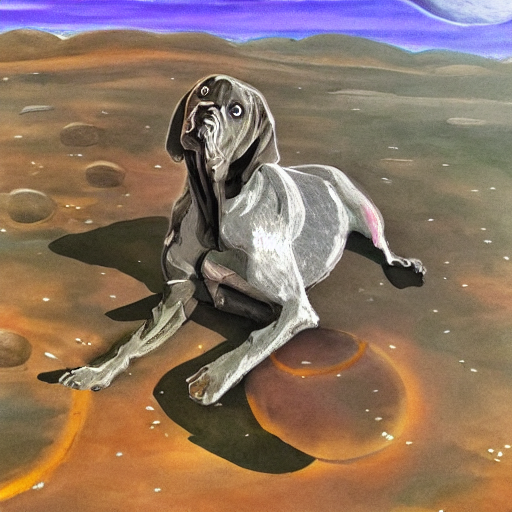

In [13]:
#pipe.run('CompVis/stable-diffusion-v1-4', 'custom-diffusion-models/dog.bin', "<new1> dog on the moon", 42, 100, 6, 1, 1, 512)
pipe.run('runwayml/stable-diffusion-v1-5', 'custom-diffusion-models/dog.bin', "painting of <new1> dog laying on the moon", 43, 100, 6, 1, 1, 512)

In [3]:
trainer = Trainer()

In [4]:
concept_images_collection = []
concept_prompt_collection = []
class_prompt_collection = []

In [10]:
row = [None] * 2
for x in range(2):
    ordinal = lambda n: "%d%s" % (n, "tsnrhtdd"[(n // 10 % 10 != 1) * (n % 10 < 4) * n % 10::4])
    ordinal_concept = ["<new1> cat", "<new2> wooden pot", "<new3> chair"]
    if(x == 0):
        visible = True
        #is_visible.append(gr.State(value=True))
    else:
        visible = False
       # is_visible.append(gr.State(value=False))

    concept_images_collection.append(gr.Files(label=f'''Upload the images for your {ordinal(x+1) if (x>0) else ""} concept''', visible=visible))
    with gr.Column(visible=visible) as row[x]:
        concept_prompt_collection.append(
            gr.Textbox(label=f'''{ordinal(x+1) if (x>0) else ""} concept prompt ''', max_lines=1, 
                        placeholder=f'''Example: "photo of a {ordinal_concept[x]}"''' )
            )  
        class_prompt_collection.append(
            gr.Textbox(label=f'''{ordinal(x+1) if (x>0) else ""} class prompt ''', 
                        max_lines=1, placeholder=f'''Example: "{ordinal_concept[x][7:]}"''')
            )
    #with gr.Row():
        #if(x < maximum_concepts-1):
            #buttons_collection.append(gr.Button(value=f"Add {ordinal(x+2)} concept", visible=visible))
        #if(x > 0):
            #delete_collection.append(gr.Button(value=f"Delete {ordinal(x+1)} concept"))

In [ ]:
trainer.run(
    'CompVis/stable-diffusion-v1-4',
    '512',
    100,
    0.00001,
    False,
    True,
    False,
    1,
    True,
    False,
    False,
    150,
    

)